# Visualizing The History Of Nobel Prize Winners (1901-2023)

## Introduction
The Nobel Prize has been one of the most prestigious international awards since 1901. Each year, it is awarded in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, recipients also receive a gold medal featuring an image of Alfred Nobel (1833 - 1896), who established the prize.

<img src='./data/nobel.png' width=20%>

In this project, we will explore and answer several questions related to Nobel Prize winners and their data. I encourage you to dive deeper and explore additional questions that pique your interest!

**Dataset:**
The Nobel Foundation has provided a dataset of all prize winners from the inception of the awards in 1901 through 2023. The dataset used in this project can be found [here](https://www.kaggle.com/datasets/shayalvaghasiya/nobel-prize-data?resource=download). Also you can use the original API to get data [here](https://www.nobelprize.org/organization/developer-zone-2/).

To get started on answering questions and creating some plots in Python, we will need some packages below:
- `pandas`: It is a data analysis and manipulation library that provides data structures and tools.
- `matplotlib.pyplot`: It is a plotting library for creating visualizations in Python.
- `seaborn`: It provides a high-level interface for drawing attractive and informative statistical graphics.

## Questions

**1.** Who was the first woman to receive a Nobel Prize, and in which category?

**2.** Which decade had the most Nobel Prize winners across all categories?

**3.** Which individuals or organizations have won more than one Nobel Prize throughout the years?

**4.** What is the gender distribution of Nobel Prize winners by category?

**5.** What is the distribution of Nobel Prize winners by birth-country and continent?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read datasets (you need to provide the related file path where your files saved)
nobel = pd.read_csv('./data/nobel.csv')
nobel.sample(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",United States of America,Male,University of California,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America
952,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus""",1/3,987,Individual,Charles Rice,1952-08-25,"Sacramento, CA",United States of America,Male,Rockefeller University,"New York, NY",United States of America,NaN,NaN,NaN
457,1975,Medicine,The Nobel Prize in Physiology or Medicine 1975,"""for their discoveries concerning the interact...",1/3,407,Individual,Renato Dulbecco,1914-02-22,Catanzaro,Italy,Male,Imperial Cancer Research Fund Laboratory,London,United Kingdom,2012-02-19,"La Jolla, CA",United States of America
139,1927,Physics,The Nobel Prize in Physics 1927,"""for his method of making the paths of electri...",1/2,34,Individual,Charles Thomson Rees Wilson,1869-02-14,Glencorse,Scotland,Male,University of Cambridge,Cambridge,United Kingdom,1959-11-15,Carlops,Scotland
47,1908,Peace,The Nobel Peace Prize 1908,NaN,1/2,473,Individual,Klas Pontus Arnoldson,1844-10-27,Gothenburg,Sweden,Male,NaN,NaN,NaN,1916-02-20,Stockholm,Sweden


In [3]:
# Check NaNs
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

### 1. Who was the first woman to receive a Nobel Prize, and in which category?

In [4]:
# Filter only women winners, find the first (oldest) one
first_woman = nobel[nobel['sex'] == 'Female'].sort_values('year', ascending= True).head(1)
# Print the answer
print(f"Answer 1: The first woman to win a Nobel Prize was {first_woman['full_name'].values[0]}, in the category of {first_woman['category'].values[0]}.")

Answer 1: The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


### 2. Which decade had the most Nobel Prize winners across all categories?

In [5]:
# Find the decades from year
nobel['decade'] = (nobel['year'] - nobel['year'] % 10).astype(str) + 's'
nobel.sample(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
467,1976,Medicine,The Nobel Prize in Physiology or Medicine 1976,"""for their discoveries concerning new mechanis...",1/2,410,Individual,D. Carleton Gajdusek,1923-09-09,"Yonkers, NY",United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,2008-12-12,Tromsø,Norway,1970s
514,1980,Physics,The Nobel Prize in Physics 1980,"""for the discovery of violations of fundamenta...",1/2,116,Individual,James Watson Cronin,1931-09-29,"Chicago, IL",United States of America,Male,University of Chicago,"Chicago, IL",United States of America,2016-08-25,"St. Paul, MN",United States of America,1980s
692,1998,Medicine,The Nobel Prize in Physiology or Medicine 1998,"""for their discoveries concerning nitric oxide...",1/3,459,Individual,Louis J. Ignarro,1941-05-31,"Brooklyn, NY",United States of America,Male,University of California School of Medicine,"Los Angeles, CA",United States of America,NaN,NaN,NaN,1990s


In [6]:
# Find the total number of winners for each decade
nobel_decades = nobel.groupby('decade')['decade'].count().reset_index(name= 'counts')
nobel_decades

,decade,counts
0,1900s,57
1,1910s,40
2,1920s,54
3,1930s,56
4,1940s,43
5,1950s,72
6,1960s,79
7,1970s,104
8,1980s,97
9,1990s,104


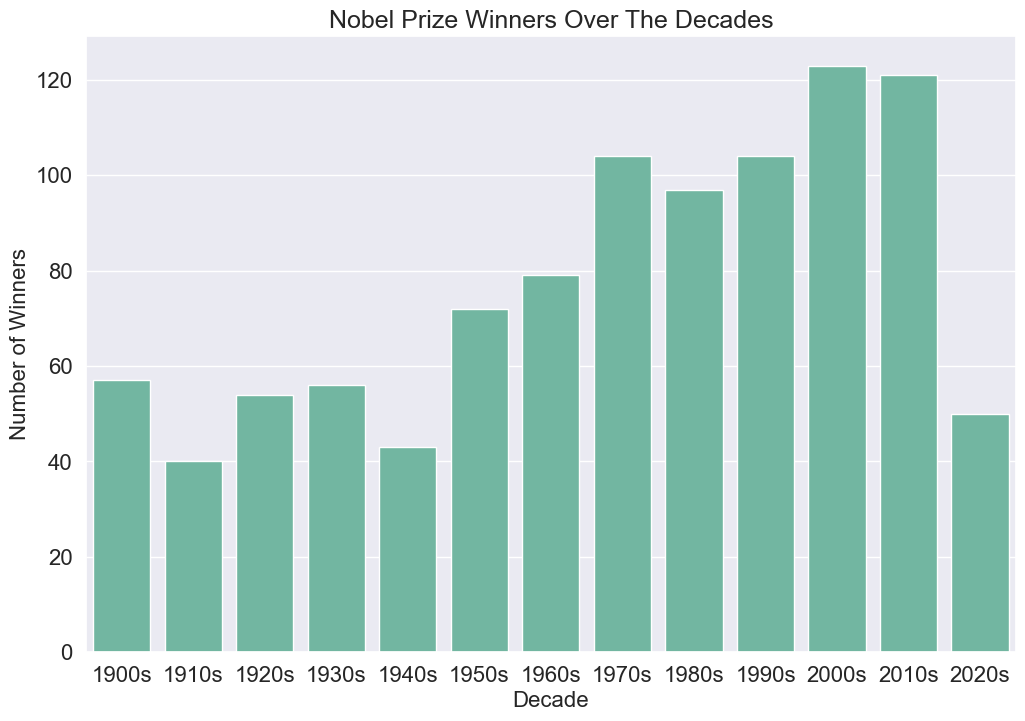

In [7]:
# Visualize total winners over the decades
# Set the theme and size of the plot
plt.figure(figsize=(12,8))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.barplot(data= nobel_decades, x= 'decade', y= 'counts')
plt.title('Nobel Prize Winners Over The Decades', fontsize= 18)

# Change labels and their settings
plt.xlabel('Decade', fontsize= 16)
plt.xticks(fontsize= 16)
plt.ylabel('Number of Winners', fontsize= 16)
plt.yticks(fontsize= 16)

# Show the plot
plt.show();

**Answer 2:** Looking at the bar chart above, we can observe that there are more Nobel Prize winners in the 2000s and 2010s. Additionally, two significant declines in the 1910s and 1940s stand out. I assume these decreases are due to the impact of World War I and World War II. Since many men were dramatically affected by the wars, and most Nobel Prize winners during that period were men, this could explain the drop in the number of winners during those decades.

### 3. Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [8]:
# Count the full_name in the data
prize_number = nobel['full_name'].value_counts().reset_index(name= 'prize_number').sort_values('prize_number', ascending= False)
# Filter them if the count is greater than 1
multiple_prize = prize_number[prize_number['prize_number'] > 1]
multiple_prize

,full_name,prize_number
0,Comité international de la Croix Rouge (Intern...,3
2,John Bardeen,2
3,Frederick Sanger,2
4,"Marie Curie, née Sklodowska",2
5,Office of the United Nations High Commissioner...,2
1,Linus Carl Pauling,2


In [9]:
# Filter winners who won multiple nobel from the nobel data
multiple_prize_full_data = nobel[nobel['full_name'].isin(multiple_prize['full_name'].tolist())]

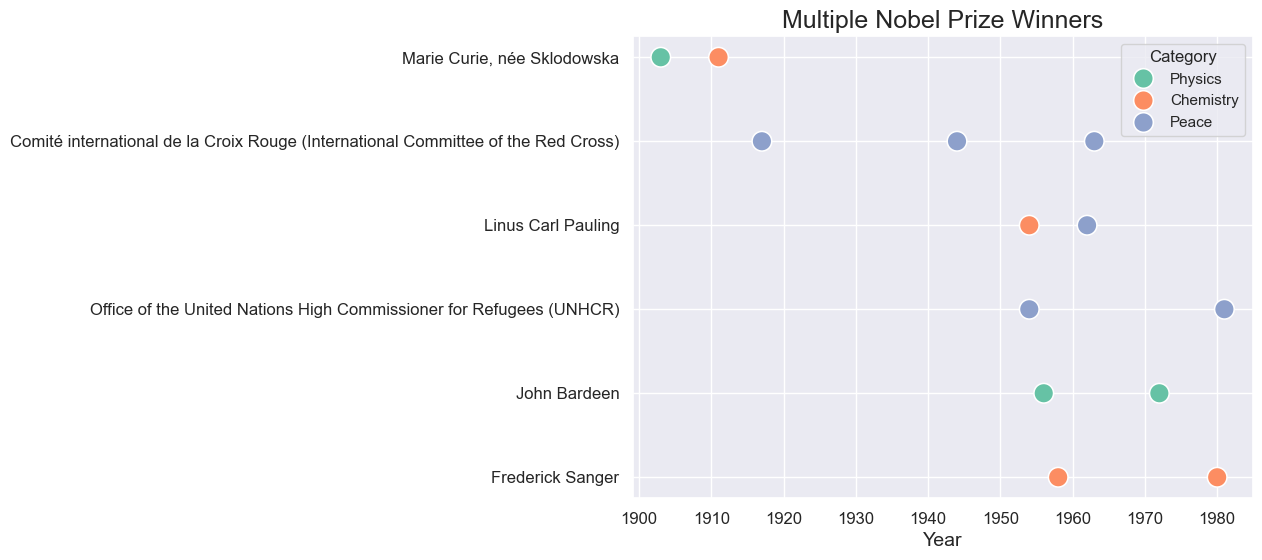

In [10]:
# Visualize multiple nobel prize winners
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title and legend
sns.scatterplot(data= multiple_prize_full_data, y= 'full_name', x= 'year', hue= 'category', s= 200)
plt.title('Multiple Nobel Prize Winners', fontsize= 18)
plt.legend(title= 'Category')

# Change labels and their settings
plt.xlabel('Year', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('')
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

**Answer 3:** There are two organizations and four individuals who have won the Nobel Prize more than once. Their names, the years they won, and the Nobel categories are displayed in the graph above.

### 4. What is the gender distribution of Nobel Prize winners by category?

In [11]:
# Find the ratio of male and female winners in the total
gender_ratio = nobel['sex'].value_counts(normalize= True)
gender_ratio

sex
Male      0.93299
Female    0.06701
Name: proportion, dtype: float64

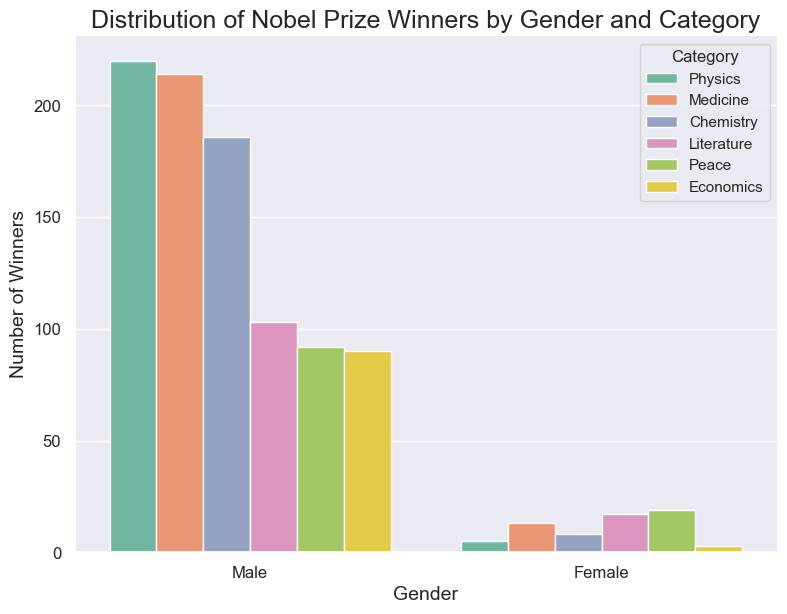

In [12]:
# Visualize winners by gender and category
# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create an order for categories to see clearly the difference (you can order by male or female)
cat_order = nobel[nobel['sex'] == 'Male'].groupby(['category', 'sex'])['full_name'].count().reset_index(name= 'counts').sort_values('counts', ascending= False)['category']

# Create the plot, change the title and legend
sns.catplot(data= nobel, kind= 'count', x= 'sex', hue= 'category', height= 6, aspect= 1.33, legend_out= False, hue_order = cat_order)
plt.title('Distribution of Nobel Prize Winners by Gender and Category', fontsize= 18)
plt.legend(title= 'Category')

# Change labels and their settings
plt.xlabel('Gender', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('Number of Winners', fontsize= 14)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

**Answer 4:** The ratio of male winners is about 93%, which is significantly higher compared to female winners. Looking at the bar chart above, males have predominantly won Nobel Prizes in Physics, Medicine, and Chemistry. While male winners in Literature and Peace are fewer compared to the top three categories, female winners have primarily been awarded in these categories (Literature and Peace).

### 5. What is the distribution of Nobel Prize winners by birth-country and continent?

In [13]:
# Glance at sample of birth_country
nobel['birth_country'].sample(10)

# OR
# nobel['birth_country'].unique()

520    United States of America
236                   Argentina
700                      Canada
229    United States of America
277                 Netherlands
826                       China
46             Prussia (Poland)
256    United States of America
264                     Ireland
847                     Liberia
Name: birth_country, dtype: object

When we look at the `birth_country` column, we notice some historical countries like Prussia or Austria-Hungary that no longer exist under these names. In the dataset, these countries are specified in parentheses. To reduce complexity and improve the readability of the results, I standardized the `birth_country`. I manually cleaned the data, creating a `fixed_birth_country` column, and saved it along with the original `birth_country` in a new CSV file called `country_fixed`. During this process, I also added a `continent` column for future use. The cleaned data is now available in my `data` folder.

To use the new dataset, all we need to do is merging two datasets.

In [14]:
# Read new dataset (you need to provide the related file path where your files saved)
country_fixed = pd.read_csv('./data/country_fixed.csv')
# Merge country_fixed data to add standardized country and continent info
nobel = nobel.merge(country_fixed, on= 'birth_country', how= 'left')
nobel.sample(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,fixed_birth_country,continent
834,2010,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analysis of markets with search fri...",1/3,858,Individual,Christopher A. Pissarides,1948-02-20,Nicosia,...,Male,London School of Economics and Political Science,London,United Kingdom,NaN,NaN,NaN,2010s,Cyprus,Europe
508,1980,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the creation of econometric models and th...",1/1,694,Individual,Lawrence R. Klein,1920-09-14,"Omaha, NE",...,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,2013-10-20,"Gladwyne, PA",United States of America,1980s,USA,North America
980,2022,Chemistry,The Nobel Prize in Chemistry 2022,"""for the development of click chemistry and bi...",1/3,1015,Individual,Carolyn Bertozzi,1966-10-10,"Boston, MA",...,Female,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN,2020s,USA,North America
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940s,NaN,NaN
845,2011,Medicine,The Nobel Prize in Physiology or Medicine 2011,"""for their discoveries concerning the activati...",1/4,862,Individual,Jules A. Hoffmann,1941-08-02,Echternach,...,Male,University of Strasbourg,Strasbourg,France,NaN,NaN,NaN,2010s,Luxembourg,Europe


In [15]:
# Find the total number of winners for each fixed_birth_country and order by continent and counts
nobel_continent = nobel.groupby(['continent', 'fixed_birth_country'])['fixed_birth_country'].count().reset_index(name= 'counts').sort_values(['continent', 'counts'], ascending= [True, False])
nobel_continent

,continent,fixed_birth_country,counts
10,Africa,South Africa,9
2,Africa,Egypt,6
0,Africa,Algeria,2
6,Africa,Liberia,2
1,Africa,Democratic Republic of the Congo,1
...,...,...,...
79,South America,Chile,2
80,South America,Colombia,2
78,South America,Brazil,1
81,South America,Peru,1


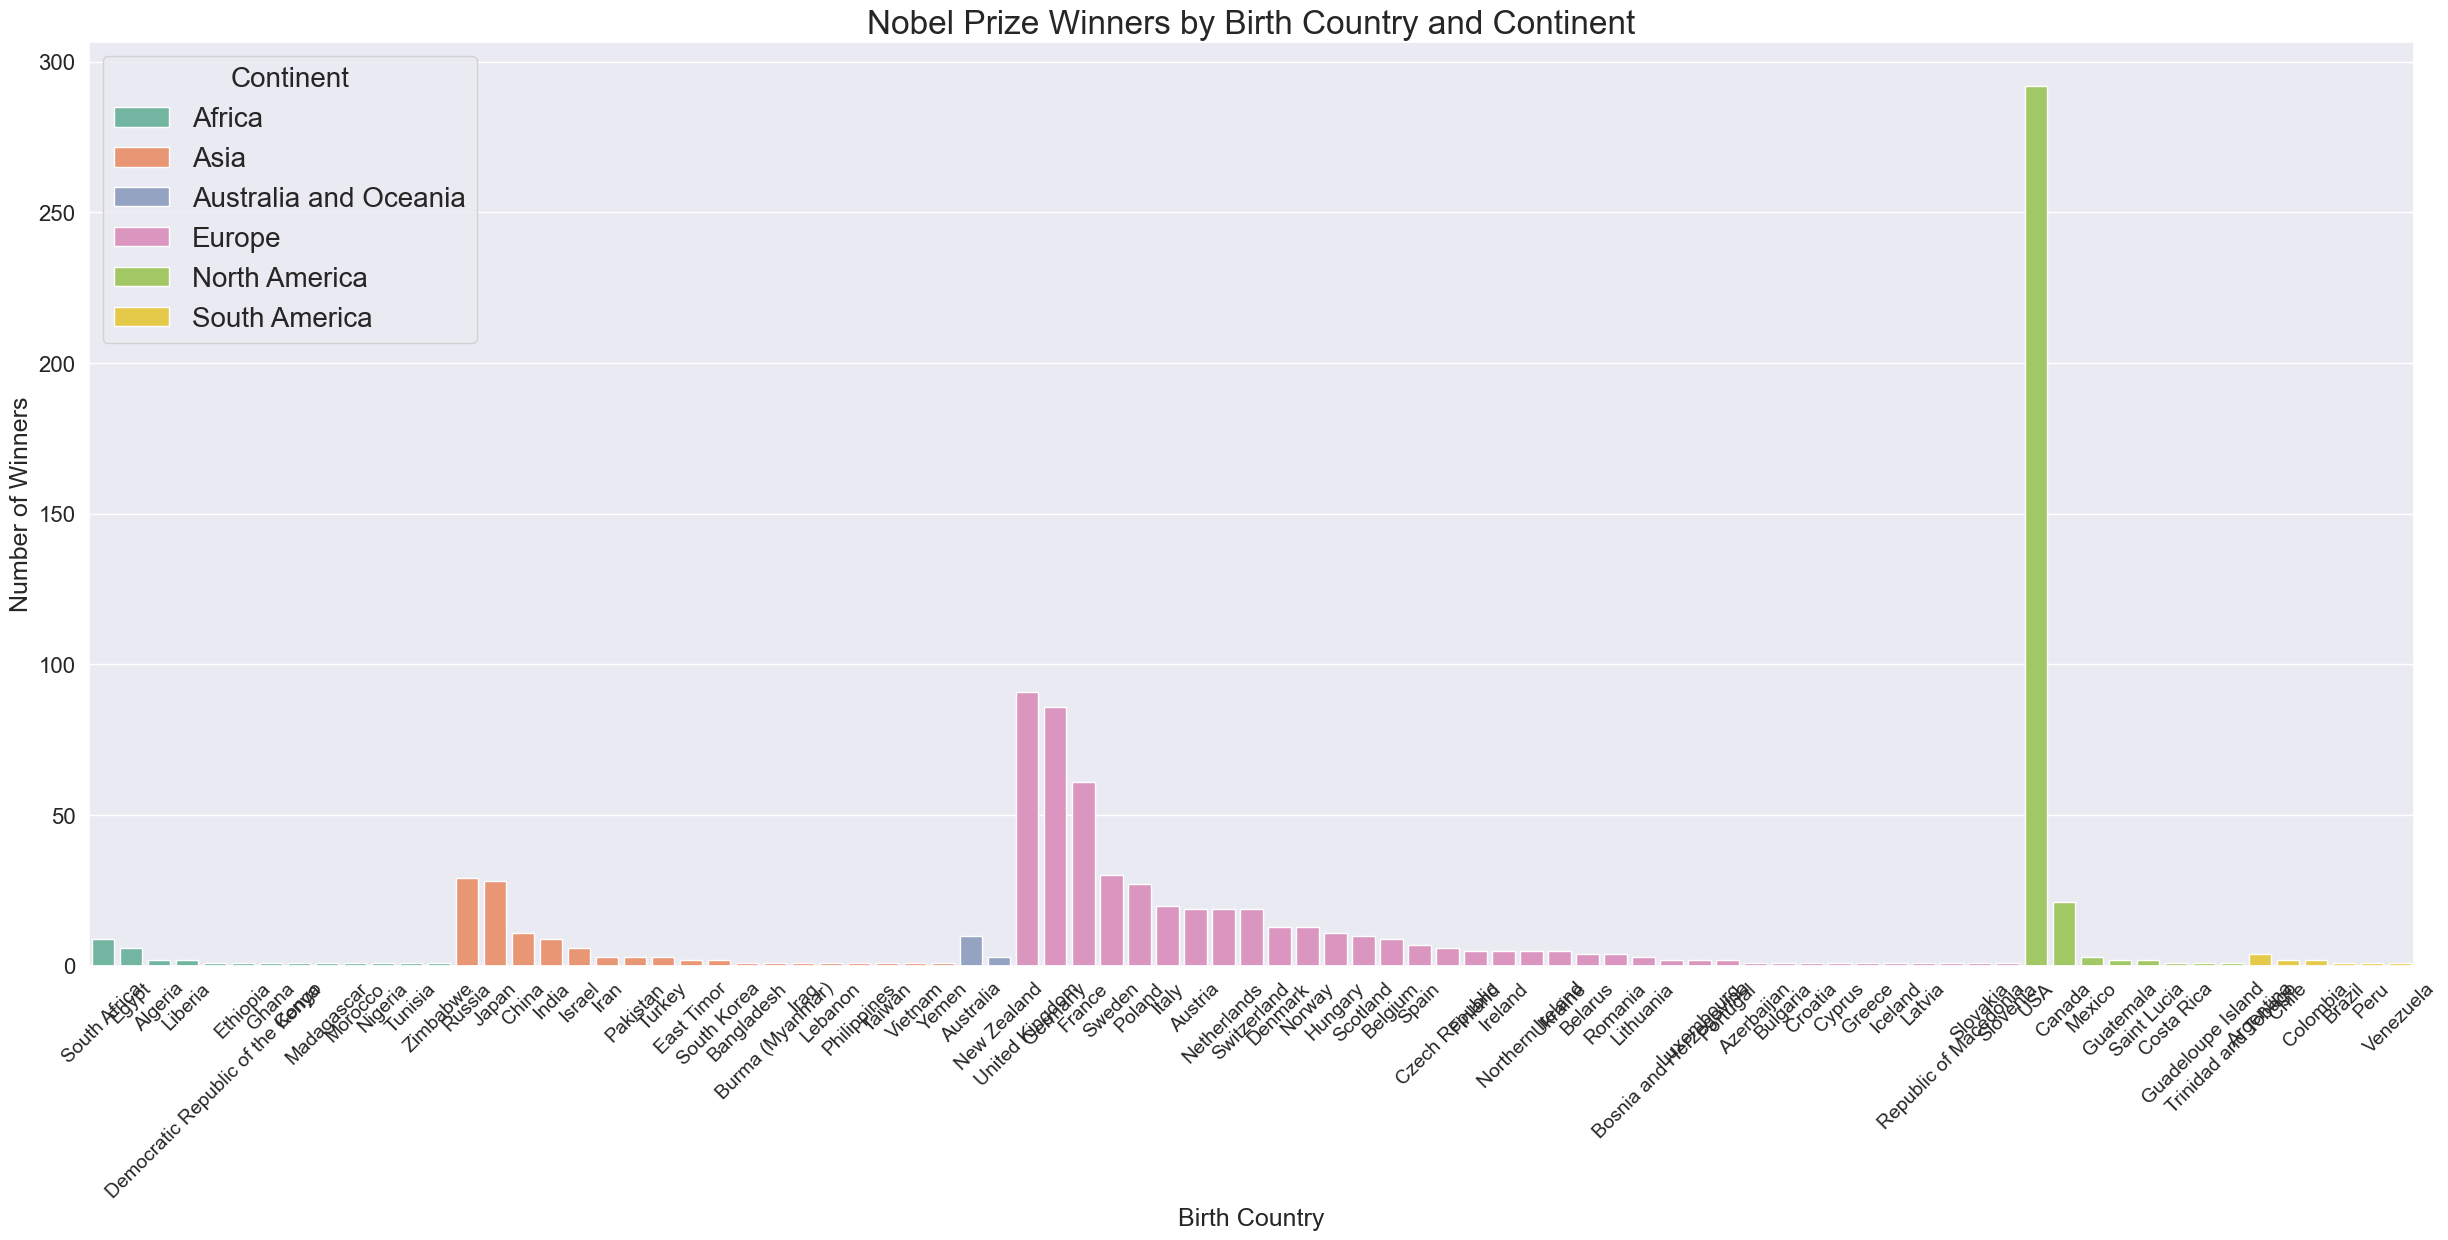

In [16]:
# Visualize winners by birth country and continent
# Set the theme and size of the plot
plt.figure(figsize=(30,12))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title and legend
sns.barplot(data= nobel_continent, x= 'fixed_birth_country', y= 'counts', hue= 'continent')
plt.title('Nobel Prize Winners by Birth Country and Continent', fontsize= 24)
plt.legend(title= 'Continent', title_fontsize= 20, fontsize= 20)

# Change labels and their settings
plt.xlabel('Birth Country', fontsize= 18)
plt.xticks(fontsize= 14, rotation= 45)
plt.ylabel('Number of Winners', fontsize= 18)
plt.yticks(fontsize= 16)

# Show the plot
plt.show();

From the bar chart above, we can observe that the USA in North America, as well as the United Kingdom and Germany in Europe, stand out. However, it's difficult to draw further conclusions from this graph alone. Since the readability is limited, we can improve it by adding a new variable, `filter_continent`, to display results for a selected continent. This will allow us to explore the data at a more detailed, continent-specific level.

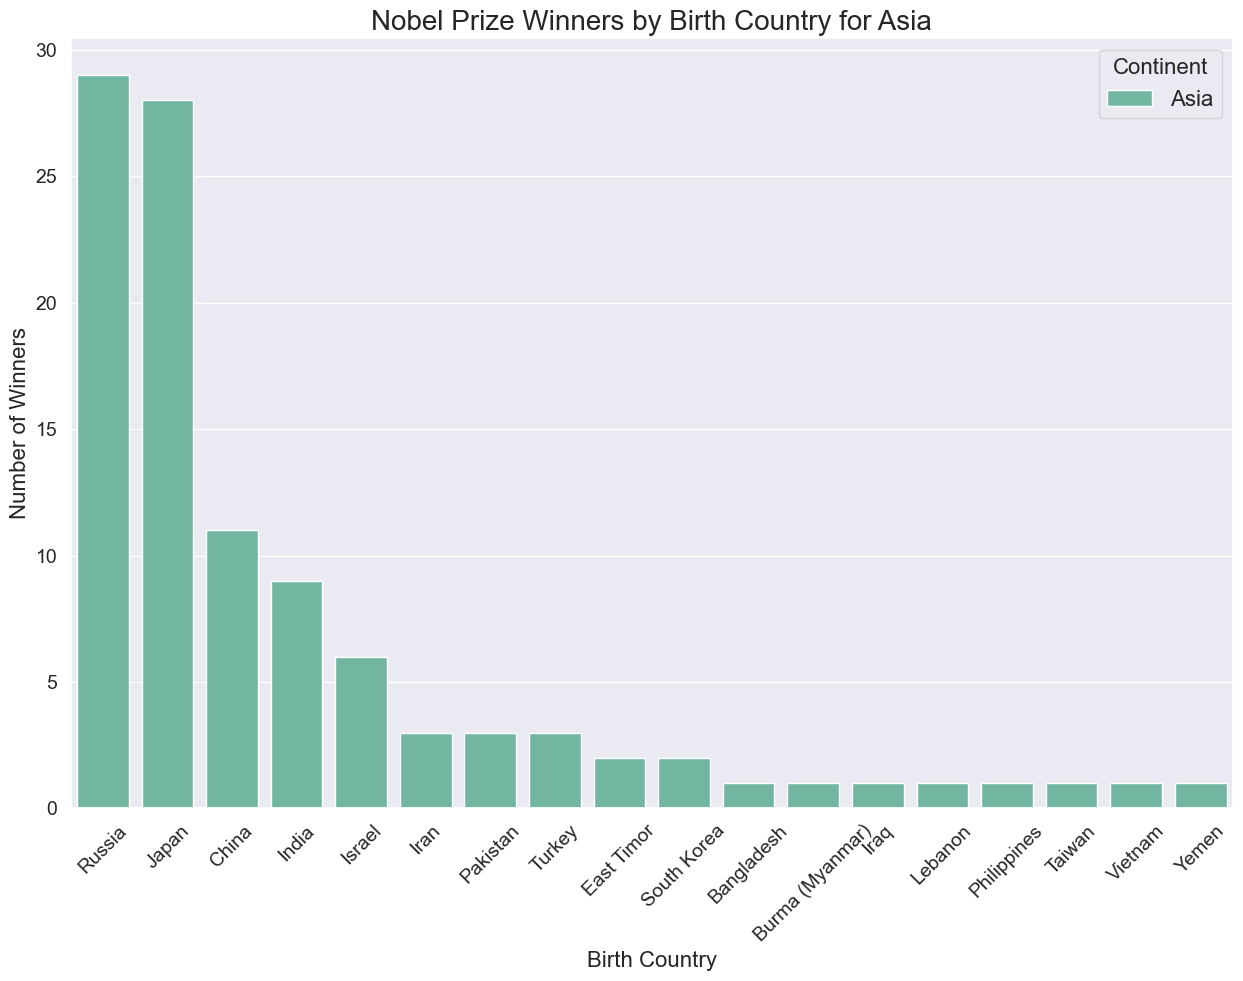

In [17]:
# Visualize winners by birth country and for one continent
# Set the theme and size of the plot
plt.figure(figsize=(15,10))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Add new variable to filter data, lets say we want to look at Asia
filter_continent = 'Asia'

# Create the plot, change the title and legend
sns.barplot(data= nobel_continent[nobel_continent['continent'] == filter_continent], x= 'fixed_birth_country', y= 'counts', hue= 'continent')
plt.title(f"Nobel Prize Winners by Birth Country for {filter_continent}", fontsize= 20)
plt.legend(title= 'Continent', title_fontsize= 16, fontsize= 16)

# Change labels and their settings
plt.xlabel('Birth Country', fontsize= 16)
plt.xticks(fontsize= 14, rotation= 45)
plt.ylabel('Number of Winners', fontsize= 16)
plt.yticks(fontsize= 14)

# Show the plot
plt.show();

**Answer 5:** When we take a closer look at Asia, Russia and Japan emerge as the most prominent countries with Nobel Prize winners. Additionally, there are more than five Nobel Prize winners from China, India, and Israel. In total, Nobel Prize winners were born in 18 different countries across Asia (note: after standardizing birth countries, there may be slight differences compared to the original data).

### 6. What is the distribution of Nobel Prize winners by gender and continent?

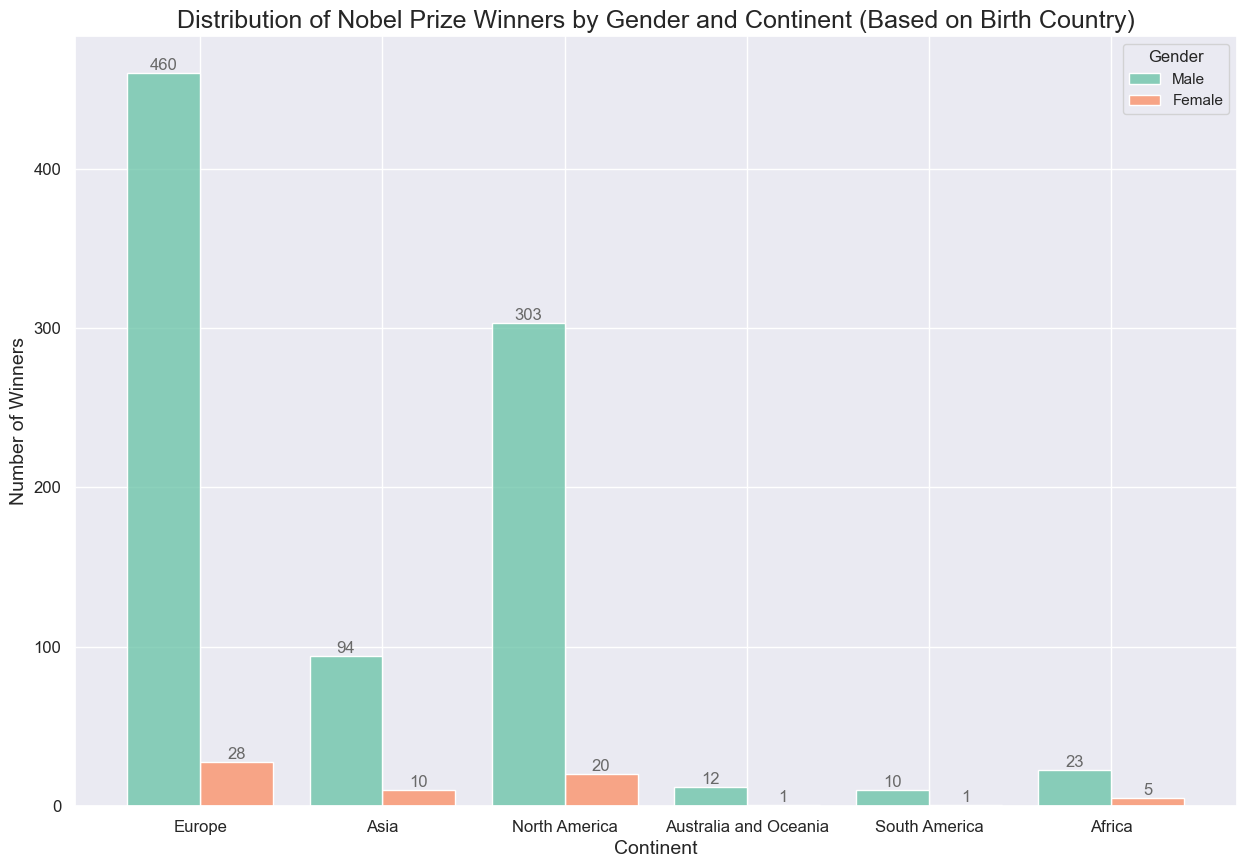

In [18]:
# Visualize winners by gender and continent
# Set the theme and size of the plot
plt.figure(figsize=(15,10))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title and legend
ax = sns.histplot(data= nobel, x= 'continent', hue= 'sex', multiple= 'dodge', shrink= 0.8)
plt.title('Distribution of Nobel Prize Winners by Gender and Continent (Based on Birth Country)', fontsize= 18)
ax.legend_.set_title('Gender')

# Loop through containers and add annotations
for container in ax.containers:
    ax.bar_label(container, fontsize=12, color='dimgray', label_type='edge')

# Change labels and their settings
plt.xlabel('Continent', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('Number of Winners', fontsize= 14)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

**Answer 6:** As we already know, the ratio of male winners is significantly higher than that of female winners (93% to 7%). Looking at the graph above, Europe and North America have a higher number of female winners compared to other continents. However, the male-to-female ratio remains fairly consistent across all continents."